# Overview
You can run through the cells in this notebook one at a time and run real-time predictions on images from your phone

In [1]:
from ipywebrtc import CameraStream, ImageRecorder # for capturing pictures
from keras.models import load_model # for loading models
from keras.applications.mobilenet_v2 import preprocess_input
from PIL import Image
import numpy as np
import io
dx_name_dict = {
    'nv': 'melanocytic nevi',
    'mel': 'melanoma',
    'bcc': 'basal cell carcinoma',
    'akiec': 'Actinic keratoses and intraepithelial carcinoma',
    'vasc': 'vascular lesions',
    'bkl': 'benign keratosis-like',
    'df': 'dermatofibroma'
}
dx_name_id_dict = {id: name for id, name in enumerate(dx_name_dict.values())}
dx_name_vec = np.array([dx_name_id_dict[k] for k in sorted(dx_name_id_dict.keys())])

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packag

In [2]:
my_model = load_model('skin_model.h5')
my_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "full_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_RGB_In (InputLayer)    (None, 224, 224, 3)       0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 1280)        5120      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               327936    
__

/srv/conda/envs/notebook/lib/python3.6/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
camera = CameraStream(constraints=
                      {'facing_mode': 'user',
                       'audio': False,
                       'video': { 'width': 224, 'height': 224 }
                       })
camera

CameraStream(constraints={'facing_mode': 'user', 'audio': False, 'video': {'width': 224, 'height': 224}})

In [4]:
image_recorder = ImageRecorder(stream=camera)
image_recorder

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'facing_mode': 'user', 'audio': False, …

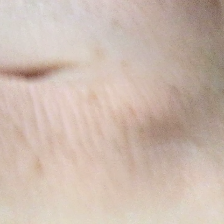

In [6]:
single_img = Image.open(io.BytesIO(image_recorder.image.value))
single_img

In [7]:
single_img_arr = np.expand_dims(np.array(single_img.convert('RGB')), 0)
nn_input_arr = preprocess_input(single_img_arr)
print(nn_input_arr.shape)

(1, 224, 224, 3)


In [8]:
nn_output_arr = my_model.predict(nn_input_arr)

# Predictions from the Model

In [9]:
nn_output_arr

array([[9.5974404e-01, 2.4311286e-03, 8.1979372e-03, 4.7548802e-04,
        1.9882564e-02, 3.2273447e-03, 6.0415068e-03]], dtype=float32)

## Show the class

In [10]:
print(f'{dx_name_vec[np.argmax(nn_output_arr)]}, {np.max(nn_output_arr):2.1%}')

melanocytic nevi, 96.0%
